In [236]:
#importing neccessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [237]:
#loading dataset into a dataframe
df = pd.read_csv(r"D:\Rahul\MSC\Dataset\Connect-4.csv")

In [238]:
#number of rows and columns of the dataset
df.shape

(67556, 43)

In [239]:
#first 5 records of the dataset
df.head()

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win


In [240]:
#unique values for output variable
df.win.unique()

array(['win', 'draw', 'loss'], dtype=object)

In [241]:
#support function to change the data type to int
def changedtype(data):
    #storing number of rows and columns into variables
    a,b=data.shape
    #data type for each attribute is object
    #to use MLP we have to convert it into the numperic type
    for i in range(b): #for the range of total number of columns
        data.iloc[:,i]= data.iloc[:,i].astype('category')  # changing the type of each column into category type
        data.iloc[:,i] = data.iloc[:,i].cat.codes #again converting it into numperic type
    return data

In [242]:
#change the data type of required columns
data=changedtype(df)
a,b=data.shape
x=data.iloc[:,:b-1] #storing input vairables into x
y=data.iloc[:,b-1] #storing output vairables into y

In [243]:
x

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.24,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67551,2,2,0,0,0,0,1,2,1,0,...,0,0,0,0,1,1,2,0,0,0
67552,2,2,0,0,0,0,1,0,0,0,...,0,0,0,0,1,2,1,1,2,0
67553,2,2,0,0,0,0,1,1,0,0,...,0,0,0,0,1,2,2,1,0,0
67554,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,2,1,2,2,0


In [244]:
y

0        2
1        2
2        2
3        2
4        2
        ..
67551    1
67552    0
67553    1
67554    0
67555    0
Name: win, Length: 67556, dtype: int8

In [245]:
#spliting dataset into training and testing
x_train_full,x_test_full,y_train_full,y_test_full=train_test_split(x,y,test_size=0.3,random_state=0)

In [246]:
x_train_full.shape

(47289, 42)

In [247]:
x_test_full.shape

(20267, 42)

In [248]:
#spliting training data into training and validation
x_train,x_valid,y_train,y_valid=train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=0)

In [249]:
x_train.shape

(37831, 42)

In [250]:
y_train.shape

(37831,)

In [251]:
x_valid.shape

(9458, 42)

# Model Building

In [286]:
#creates a Sequential model.
model = keras.models.Sequential()#create an instance
model.add(keras.layers.Dense(42, activation="relu",input_dim=42,)) #input layer
model.add(keras.layers.Dense(60, activation="relu")) #hidden layer
model.add(keras.layers.Dense(40, activation="relu")) #hidden layer
model.add(keras.layers.Dense(20, activation="relu")) #hidden layer
model.add(keras.layers.Dense(8, activation="relu")) #hidden layer
model.add(keras.layers.Dense(3, activation="softmax")) #output layer with softmax function

In [287]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 42)                1806      
_________________________________________________________________
dense_61 (Dense)             (None, 60)                2580      
_________________________________________________________________
dense_62 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_63 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_65 (Dense)             (None, 3)                 27        
Total params: 7,841
Trainable params: 7,841
Non-trainable params: 0
___________________________________________________

In [288]:
model.layers

In [289]:
model.layers[0].name #name of first layer

'dense_60'

In [290]:
model.layers[1].name #name of second layer

'dense_61'

# Compiling model

In [291]:
model.compile(loss="sparse_categorical_crossentropy",  #"sparse_categorical_crossentropy",
optimizer="sgd", #"sgd",
metrics=["accuracy"]) # could be a custom function as well!

# Creating a check point

In [292]:
#check point
#to save the best model only (when performance for validation set is best)
#save weight only = false to not store full model
#saving model as connect4_checkpoint.h5
checkpoint=keras.callbacks.ModelCheckpoint("connect4_checkpoint.h5",save_best_only=True,save_weights_only=False)

# Fitting model with callback

In [293]:
fithistory = model.fit(x_train, y_train, epochs=30,validation_data=(x_valid, y_valid),verbose=2,callbacks=[checkpoint])
#fitting the model with training data
#number of epochs equal to 20
#specifying validation set for the model
#verbose = 2 to see result after each epoches
# set callback parameter equal to checkpoint to save the model

Train on 37831 samples, validate on 9458 samples
Epoch 1/30
37831/37831 - 3s - loss: 0.8513 - acc: 0.6557 - val_loss: 0.8335 - val_acc: 0.6608
Epoch 2/30
37831/37831 - 2s - loss: 0.8344 - acc: 0.6558 - val_loss: 0.8226 - val_acc: 0.6608
Epoch 3/30
37831/37831 - 2s - loss: 0.8258 - acc: 0.6558 - val_loss: 0.8148 - val_acc: 0.6608
Epoch 4/30
37831/37831 - 2s - loss: 0.8181 - acc: 0.6558 - val_loss: 0.8056 - val_acc: 0.6608
Epoch 5/30
37831/37831 - 2s - loss: 0.8091 - acc: 0.6558 - val_loss: 0.7953 - val_acc: 0.6609
Epoch 6/30
37831/37831 - 2s - loss: 0.7965 - acc: 0.6575 - val_loss: 0.7832 - val_acc: 0.6698
Epoch 7/30
37831/37831 - 2s - loss: 0.7794 - acc: 0.6686 - val_loss: 0.7641 - val_acc: 0.6778
Epoch 8/30
37831/37831 - 2s - loss: 0.7571 - acc: 0.6836 - val_loss: 0.7412 - val_acc: 0.6916
Epoch 9/30
37831/37831 - 2s - loss: 0.7333 - acc: 0.7004 - val_loss: 0.7865 - val_acc: 0.6850
Epoch 10/30
37831/37831 - 2s - loss: 0.7086 - acc: 0.7101 - val_loss: 0.7825 - val_acc: 0.6626
Epoch 11/3

In [294]:
fithistory.history

{'loss': [0.8512716736490004,
  0.8344461542974995,
  0.8258230836148626,
  0.8180822104224288,
  0.809144410448371,
  0.7964556333516485,
  0.7794357713030576,
  0.7571473862506223,
  0.7333193140797705,
  0.7086417080626191,
  0.6870874892644042,
  0.6718917398040154,
  0.6576093103192976,
  0.646513575833989,
  0.6357738693609816,
  0.6273882289994059,
  0.6182458529354248,
  0.6090755152310334,
  0.604574940678609,
  0.5978576147299648,
  0.5899293769430337,
  0.5867903765661919,
  0.5799614432035721,
  0.5723603987012519,
  0.5672155629042601,
  0.5627672724942376,
  0.5565645882191645,
  0.5519093820636005,
  0.5472207801618236,
  0.5432566294778881],
 'acc': [0.65565276,
  0.65578496,
  0.65578496,
  0.65578496,
  0.65581137,
  0.65747666,
  0.6685787,
  0.6835928,
  0.70035154,
  0.7100526,
  0.7219476,
  0.73101425,
  0.73630095,
  0.73965794,
  0.7458698,
  0.7498084,
  0.7532447,
  0.75604665,
  0.7583199,
  0.7627343,
  0.76487535,
  0.7666464,
  0.7696862,
  0.77235603,
  

In [295]:
import matplotlib.pyplot as plt

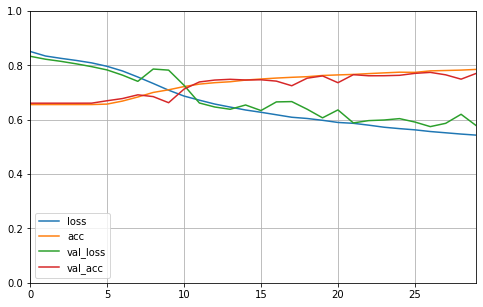

In [296]:
pd.DataFrame(fithistory.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [297]:
#checking the loss and accuracy after model training
loss,acc=model.evaluate(x_test_full, y_test_full,verbose=2)

20267/20267 - 1s - loss: 0.5824 - acc: 0.7659


In [298]:
#predicting values for few records using the trained model
model.predict(x_train[:5])
# as we are using softmax layer it returns the probability for each class

array([[0.06071274, 0.00851116, 0.93077606],
       [0.2301669 , 0.46083722, 0.3089959 ],
       [0.09364663, 0.42208207, 0.48427132],
       [0.04715882, 0.06191947, 0.8909217 ],
       [0.06209475, 0.03352956, 0.9043757 ]], dtype=float32)

In [299]:
#loading the saved model into model_trained
model_trained=keras.models.load_model("connect4_checkpoint.h5")

In [300]:
#using the loaded model predicting few records
model_trained.predict(x_train[:5])

array([[0.07941521, 0.01556477, 0.90502   ],
       [0.21322402, 0.30729848, 0.47947752],
       [0.09989322, 0.5624158 , 0.33769095],
       [0.05962494, 0.08201767, 0.85835737],
       [0.12254645, 0.18590595, 0.69154763]], dtype=float32)

In [301]:
#checking the loss and accuracy of loaded model
loss,acc=model_trained.evaluate(x_test_full, y_test_full,verbose=2)

20267/20267 - 1s - loss: 0.5774 - acc: 0.7677


In [302]:
#here, we can see for saved model the loss is less and accuracy is better than the first model 
#because it stores the best weights/model for when performance for validation set is best

# checkpoint- storing full model

In [312]:
#storing complete model and weights
#creates a Sequential model.
model = keras.models.Sequential()#create an instance
model.add(keras.layers.Dense(42, activation="relu",input_dim=42,)) #input layer
model.add(keras.layers.Dense(60, activation="relu")) #hidden layer
model.add(keras.layers.Dense(40, activation="relu")) #hidden layer
model.add(keras.layers.Dense(20, activation="relu")) #hidden layer
model.add(keras.layers.Dense(8, activation="relu")) #hidden layer
model.add(keras.layers.Dense(3, activation="softmax")) #output layer with softmax function

model.compile(loss="sparse_categorical_crossentropy",  #"sparse_categorical_crossentropy",
optimizer="sgd", #"sgd",
metrics=["accuracy"]) # could be a custom function as well!

#check point 2
#to save all models
#save weight only = true to store full model
#saving model as connect4_checkpoint.h5
checkpoint2=keras.callbacks.ModelCheckpoint("checkpoint2.h5",save_best_only=True,save_weights_only=False)
fithistory = model.fit(x_train, y_train, epochs=30,validation_data=(x_valid, y_valid),verbose=2,callbacks=[checkpoint2])
#fitting the model with training data
#number of epochs equal to 20
#specifying validation set for the model
#verbose = 2 to see result after each epoches
# set callback parameter equal to checkpoint2 to save the model



Train on 37831 samples, validate on 9458 samples
Epoch 1/30
37831/37831 - 3s - loss: 0.8551 - acc: 0.6486 - val_loss: 0.8255 - val_acc: 0.6608
Epoch 2/30
37831/37831 - 2s - loss: 0.8256 - acc: 0.6558 - val_loss: 0.8116 - val_acc: 0.6608
Epoch 3/30
37831/37831 - 2s - loss: 0.8142 - acc: 0.6558 - val_loss: 0.8011 - val_acc: 0.6608
Epoch 4/30
37831/37831 - 2s - loss: 0.8023 - acc: 0.6558 - val_loss: 0.7866 - val_acc: 0.6609
Epoch 5/30
37831/37831 - 2s - loss: 0.7874 - acc: 0.6619 - val_loss: 0.7858 - val_acc: 0.6856
Epoch 6/30
37831/37831 - 2s - loss: 0.7670 - acc: 0.6788 - val_loss: 0.7559 - val_acc: 0.6921
Epoch 7/30
37831/37831 - 2s - loss: 0.7423 - acc: 0.6922 - val_loss: 0.7536 - val_acc: 0.6874
Epoch 8/30
37831/37831 - 2s - loss: 0.7176 - acc: 0.7047 - val_loss: 0.7250 - val_acc: 0.7028
Epoch 9/30
37831/37831 - 2s - loss: 0.6971 - acc: 0.7138 - val_loss: 0.7342 - val_acc: 0.7005
Epoch 10/30
37831/37831 - 2s - loss: 0.6787 - acc: 0.7217 - val_loss: 0.7245 - val_acc: 0.6887
Epoch 11/3

In [313]:
#loading the second saved model into model_trained_2
model_trained_2=keras.models.load_model("checkpoint2.h5")

In [314]:
#checking the loss and accuracy of loaded model
loss,acc=model_trained_2.evaluate(x_test_full, y_test_full,verbose=2)

20267/20267 - 1s - loss: 0.5746 - acc: 0.7695
